In [97]:
import requests

from typing import Any
from yaml import safe_load
from typing import Callable
from matplotlib import pyplot

## Configuration

In [98]:
# Retrieve configuration file for elastic
with open("../debug.config.yml") as config:
    config_file = safe_load(config)["backend"]

## Evaluation

### Setup

In [99]:
ORACLES = 1

In [100]:
colors_map: dict[str, str] = {
    "precision": "orange",
    "recall": "royalblue",
    "f1": "forestgreen",
    "ap": "firebrick"
}

ground_truth_needles: dict[str, list[str]] = {
    "weather forecast service": [
        "663a01d3b43474523aefbef6",
        "663a01d3b43474523aefbef5",
        "663a0b2eb43474523aefbef8",
        "663a0575b43474523aefbef7"
    ],
    "american sports news articles": [
        "663caaaf76481aa0487cfe1c",
        "663cac6776481aa0487cfe1d",
        "663cb06576481aa0487cfe1e",
        "663deba076481aa0487cfe1f"
    ],
    "digital book library": [
        "663f822b76481aa0487cfe23",
        "663f83df76481aa0487cfe24",
        "663f86c776481aa0487cfe25",
        "663f892876481aa0487cfe26"  
    ],
    "restaurant booking platform": [
        "66409b1376481aa0487cfe2a",
        "66409e3876481aa0487cfe2c",
        "6640a12176481aa0487cfe2d",
        "6640a2ce76481aa0487cfe2e"
    ]
}

ground_truth_total_ranks: dict[str, list[str]] = {
    "weather forecast service": [
        "655a2b49863e4a08a6f2256f",
        "655a168820959f0f93b42546",
        "655a2b68863e4a08a6f22770",
        "655aa97e863e4a08a6f3690f",
        "655a6a0d863e4a08a6f2ee30",
        "655a1fbc863e4a08a6eed4d2",
        "655a284c863e4a08a6f1dad4",
        "655a2bb9863e4a08a6f22ddd",
        "655a2c70863e4a08a6f238c0",
        "655a2be2863e4a08a6f230bc" 
    ],
    "maps service": [
        "655a2be2863e4a08a6f230bc",
        "655a2be3863e4a08a6f230c8",
        "655a2be3863e4a08a6f230d3",
        "655a2be5863e4a08a6f230f2",
        "655b9761863e4a08a6f516a8",
        "655a184c20959f0f93b46c74",
        "655b986b863e4a08a6f5206d",
        "655a2b2d863e4a08a6f2238c",
        "655a2b1f863e4a08a6f222a3",
        "655a6a0d863e4a08a6f2ee30"
    ],
    "digital book library": [
        "655aadfe863e4a08a6f395b6",
        "655b0fa2863e4a08a6f40f81",
        "655aa969863e4a08a6f36807",
        "655a803d863e4a08a6f33a40",
        "655ab14d863e4a08a6f3bc95",
        "655aaa73863e4a08a6f37380",
        "655aaa67863e4a08a6f372ea",
        "655a107d20959f0f93b309c5",
        "655a2ad4863e4a08a6f21ed7",
        "655a2ad4863e4a08a6f21ee2"
    ],
    "tournaments and leaderboards": [
        "655aab32863e4a08a6f37cac",
        "655a171f20959f0f93b43d9a",
        "655a2b67863e4a08a6f2275b",
        "655a6d04863e4a08a6f30ba8",
        "655a2bd3863e4a08a6f22f67",
        "655a6f7b863e4a08a6f31941",
        "655a2b35863e4a08a6f22411",
        "655a184c20959f0f93b46c74",
        "655a164e20959f0f93b41b17",
        "655a2ea5863e4a08a6f24d54" 
    ]
}

ground_truth_total_rel: dict[str, dict[str, int]] = {
    "weather forecast service": {
        "655a2b49863e4a08a6f2256f": 1,
        "655a168820959f0f93b42546": 0,
        "655a2b68863e4a08a6f22770": 1,
        "655aa97e863e4a08a6f3690f": 1,
        "655a6a0d863e4a08a6f2ee30": 0,
        "655a1fbc863e4a08a6eed4d2": 0,
        "655a284c863e4a08a6f1dad4": 0,
        "655a2bb9863e4a08a6f22ddd": 0,
        "655a2c70863e4a08a6f238c0": 0,
        "655a2be2863e4a08a6f230bc": 0
    },
    "maps service": {
        "655a2be2863e4a08a6f230bc": 1,
        "655a2be3863e4a08a6f230c8": 1,
        "655a2be3863e4a08a6f230d3": 1,
        "655a2be5863e4a08a6f230f2": 1,
        "655b9761863e4a08a6f516a8": 0,
        "655a184c20959f0f93b46c74": 1,
        "655b986b863e4a08a6f5206d": 1,
        "655a2b2d863e4a08a6f2238c": 0,
        "655a2b1f863e4a08a6f222a3": 0,
        "655a6a0d863e4a08a6f2ee30": 0
    },
    "digital book library": {
        "655aadfe863e4a08a6f395b6": 1,
        "655b0fa2863e4a08a6f40f81": 1,
        "655aa969863e4a08a6f36807": 1,
        "655a803d863e4a08a6f33a40": 1,
        "655ab14d863e4a08a6f3bc95": 1,
        "655aaa73863e4a08a6f37380": 0,
        "655aaa67863e4a08a6f372ea": 1,
        "655a107d20959f0f93b309c5": 1,
        "655a2ad4863e4a08a6f21ed7": 0,
        "655a2ad4863e4a08a6f21ee2": 0
    },
    "tournaments and leaderboards": {
        "655aab32863e4a08a6f37cac": 1,
        "655a171f20959f0f93b43d9a": 1,
        "655a2b67863e4a08a6f2275b": 1,
        "655a6d04863e4a08a6f30ba8": 0,
        "655a2bd3863e4a08a6f22f67": 0,
        "655a6f7b863e4a08a6f31941": 0,
        "655a2b35863e4a08a6f22411": 0,
        "655a184c20959f0f93b46c74": 0,
        "655a164e20959f0f93b41b17": 0,
        "655a2ea5863e4a08a6f24d54": 1
    }
}

evaluations: dict[str, dict[str, float]] = {}

In [101]:
ground_truth_words_weather: dict[str, list[str]] = {
    "weather": [
        "663a01d3b43474523aefbef6",
        "663a01d3b43474523aefbef5",
        "663a0b2eb43474523aefbef8",
        "663a0575b43474523aefbef7"
    ],
    "weather forecast": [
        "663a01d3b43474523aefbef6",
        "663a01d3b43474523aefbef5",
        "663a0b2eb43474523aefbef8",
        "663a0575b43474523aefbef7"
    ],
    "weather forecast service": [
        "663a01d3b43474523aefbef6",
        "663a01d3b43474523aefbef5",
        "663a0b2eb43474523aefbef8",
        "663a0575b43474523aefbef7"
    ],
    "the api returns the next 4 days\nof weather forecasts": [
        "663a01d3b43474523aefbef6",
        "663a01d3b43474523aefbef5",
        "663a0b2eb43474523aefbef8",
        "663a0575b43474523aefbef7"
    ],
}

ground_truth_words_library: dict[str, list[str]] = {
    "digital": [
        "663f822b76481aa0487cfe23",
        "663f83df76481aa0487cfe24",
        "663f86c776481aa0487cfe25",
        "663f892876481aa0487cfe26"  
    ],
    "digital book": [
        "663f822b76481aa0487cfe23",
        "663f83df76481aa0487cfe24",
        "663f86c776481aa0487cfe25",
        "663f892876481aa0487cfe26"  
    ],
    "digital book library": [
        "663f822b76481aa0487cfe23",
        "663f83df76481aa0487cfe24",
        "663f86c776481aa0487cfe25",
        "663f892876481aa0487cfe26"  
    ],
    "API for managing digital library resources\nretrieving books authors and publishers": [
        "663f822b76481aa0487cfe23",
        "663f83df76481aa0487cfe24",
        "663f86c776481aa0487cfe25",
        "663f892876481aa0487cfe26"  
    ],
}

ground_truth_words_restaurant: dict[str, list[str]] = {
    "restaurant": [
        "66409b1376481aa0487cfe2a",
        "66409e3876481aa0487cfe2c",
        "6640a12176481aa0487cfe2d",
        "6640a2ce76481aa0487cfe2e"
    ],
    "restaurant booking": [
        "66409b1376481aa0487cfe2a",
        "66409e3876481aa0487cfe2c",
        "6640a12176481aa0487cfe2d",
        "6640a2ce76481aa0487cfe2e"
    ],
    "restaurant booking platform": [
        "66409b1376481aa0487cfe2a",
        "66409e3876481aa0487cfe2c",
        "6640a12176481aa0487cfe2d",
        "6640a2ce76481aa0487cfe2e"
    ],
    "Allows users to create a booking for a\nspecific restaurant ID of the restaurant": [
        "66409b1376481aa0487cfe2a",
        "66409e3876481aa0487cfe2c",
        "6640a12176481aa0487cfe2d",
        "6640a2ce76481aa0487cfe2e"
    ]
}

ground_truth_words_sports: dict[str, list[str]] = {
    "american sports": [
        "663caaaf76481aa0487cfe1c",
        "663cac6776481aa0487cfe1d",
        "663cb06576481aa0487cfe1e",
        "663deba076481aa0487cfe1f"
    ],
    "american sports news": [
        "663caaaf76481aa0487cfe1c",
        "663cac6776481aa0487cfe1d",
        "663cb06576481aa0487cfe1e",
        "663deba076481aa0487cfe1f"
    ],
    "american sports news articles": [
        "663caaaf76481aa0487cfe1c",
        "663cac6776481aa0487cfe1d",
        "663cb06576481aa0487cfe1e",
        "663deba076481aa0487cfe1f"
    ],
    "An API for accessing news articles across\nvarious sports leagues including NFL": [
        "663caaaf76481aa0487cfe1c",
        "663cac6776481aa0487cfe1d",
        "663cb06576481aa0487cfe1e",
        "663deba076481aa0487cfe1f"
    ],
}

In [102]:
def perform_search_query(query: str, k: int=10) -> list[str]:
    url: str = f"http://localhost:{config_file['port']}/api/v1/search?size={k}"
    body: dict[str, str | list[str]] = {
        "fragment": query.replace("\n", " "),
        "fields": ["metadata"]
    }
    
    res: list[dict[str, Any]] = requests.post(url, json=body).json()
    
    return [doc["metadata"]["mongo-id"] for doc in res]

In [103]:
def is_relevant(query:str, document: str):
    return ground_truth_total_rel[query][document] > (ORACLES / 2)

### Metrics

In [104]:
def precision(found_docs: list[str], docs: list[str]=None, k: int=10) -> float:
    return len(found_docs) / k

In [105]:
def recall(found_docs: list[str], docs: list[str], k: int=10) -> float:
    return len(found_docs) / len(docs)

In [106]:
def f1(found_docs: list[str], docs: list[str], k: int=10) -> float:
    precision_score = len(found_docs) / k
    recall_score = len(found_docs) / len(docs)
    
    if precision_score + recall_score == 0:
        return 0
    
    return 2 * ((precision_score * recall_score) / (precision_score + recall_score))

In [107]:
def ap(query: str, k: int=10) -> float:
    global ground_truth_total_ranks, ground_truth_total_rel
    
    num = 0
    docs = ground_truth_total_ranks[query]
    
    for i in range(k):
        relevant_docs = list(filter(lambda x: is_relevant(query, x), docs[:k]))
        
        precision_score = precision(relevant_docs, k=k)
        rel_score = 1 if is_relevant(query, docs[i]) else 0
        
        num += precision_score * rel_score
        
    return num / k

In [108]:
def evaluate_metric(metric: Callable[[list[str], list[str], int], float], to_evaluate: dict[str, list[str]], k: int=10, total: bool=False):
    global evaluations
    
    for query, docs in to_evaluate.items():
        if not total:
            found_docs = perform_search_query(query, k)[:k]
            found_docs = list(filter(lambda x: x in docs, found_docs))
            
            metric_value = metric(found_docs, docs, k)
        else:
            if metric.__name__ != "ap":
                relevant_docs = list(filter(lambda x: is_relevant(query, x), docs[:k]))
                metric_value = metric(relevant_docs, docs, k)
            else:
                metric_value = ap(query, k)
            
        if query not in evaluations:
                evaluations[query] = {}
        
        evaluations[query][f"{metric.__name__}@{k}"] = metric_value

### Results

In [109]:
def display_graph(query: str, metrics: list[str], axes: Any, position: list[int]):
    global evaluations
    
    for metric in metrics:
        y = [val for key, val in evaluations[query].items() if metric in key]
        x = [k+1 for k in range(len(y))]
        
        axes[position[0], position[1]].scatter([str(x_i) for x_i in x], y, label=metric, color=colors_map[metric])
        axes[position[0], position[1]].plot([str(x_i) for x_i in x], y, color=colors_map[metric])
    
    axes[position[0], position[1]].set_title(query, wrap=True)
    axes[position[0], position[1]].set_ylim(-0.05, 1.05)
    axes[position[0], position[1]].set_xlabel("Number of documents (K)")
    axes[position[0], position[1]].set_ylabel("Metric score")
    axes[position[0], position[1]].legend()

In [110]:
def perform_evaluation(metrics: list[str], ground_truth: dict, k: int=10, rows: int=2, cols: int=2, total: bool=False):
    global evaluations
    
    for metric in metrics:
        for i in range(1, k+1):
            evaluate_metric(globals()[metric], ground_truth, i, total)
    
    fig, axs = pyplot.subplots(rows, cols, figsize=(8, 6))
    fig.suptitle("Metrics @K for some test queries\n")
    fig.tight_layout(h_pad=3)
        
    for ind, query in enumerate(evaluations.keys()):
        position = bin(ind).replace("0b", "")
        position = f"0{position}" if len(position) == 1 else position
        
        display_graph(query, metrics, axs, [int(position[0]), int(position[1])])

    fig.tight_layout(h_pad=1)
    pyplot.savefig("out.pdf")

In [111]:
def get_averages(metrics: list[str], k:int = 10):
    for metric in metrics:
        for i in range(1, k+1):
            all_values_k = []
            
            for values in evaluations.values():
                all_values_k.append(values[f"{metric}@{i}"])
            
            print(f"{metric}@{i}: ", sum(all_values_k) / len(all_values_k))

precision@1:  1.0
precision@2:  0.875
precision@3:  0.9166666666666666
precision@4:  0.875
precision@5:  0.75
precision@6:  0.6666666666666667
precision@7:  0.6428571428571428
precision@8:  0.59375
precision@9:  0.5277777777777778
precision@10:  0.5
ap@1:  1.0
ap@2:  0.8125
ap@3:  0.8611111111111112
ap@4:  0.78125
ap@5:  0.59
ap@6:  0.47222222222222227
ap@7:  0.4591836734693877
ap@8:  0.40234375
ap@9:  0.31790123456790126
ap@10:  0.27499999999999997


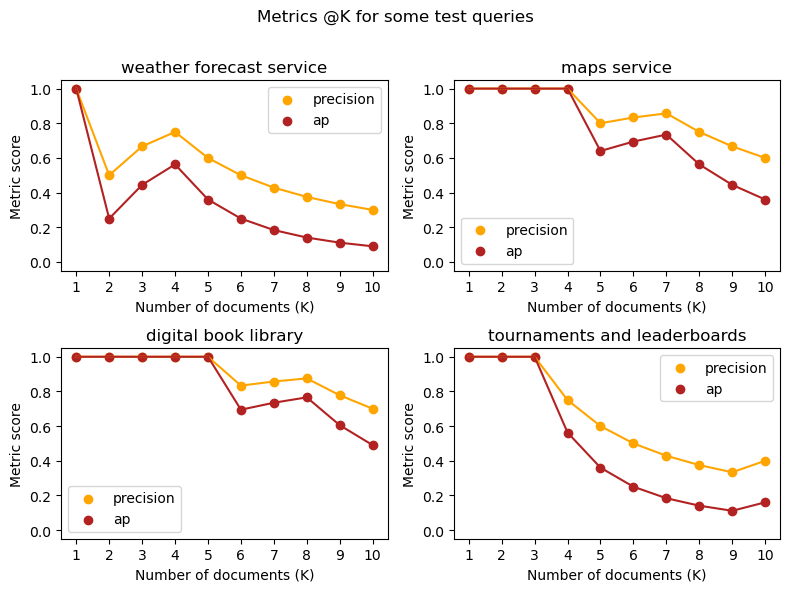

In [112]:
# perform_evaluation(["precision", "recall", "f1"], ground_truth_needles)
# perform_evaluation(["precision", "recall", "f1"], ground_truth_words_sports)
perform_evaluation(["precision", "ap"], ground_truth_total_ranks, 10, total=True)
get_averages(["precision", "ap"])